# Tutorial on Clustering Algorithm



Clustering as a general is a technique that most of us do in our lives. 
For instance, sharing a same table in a restaurants, or in a super market where similar products are placed 
together or nearby location. 

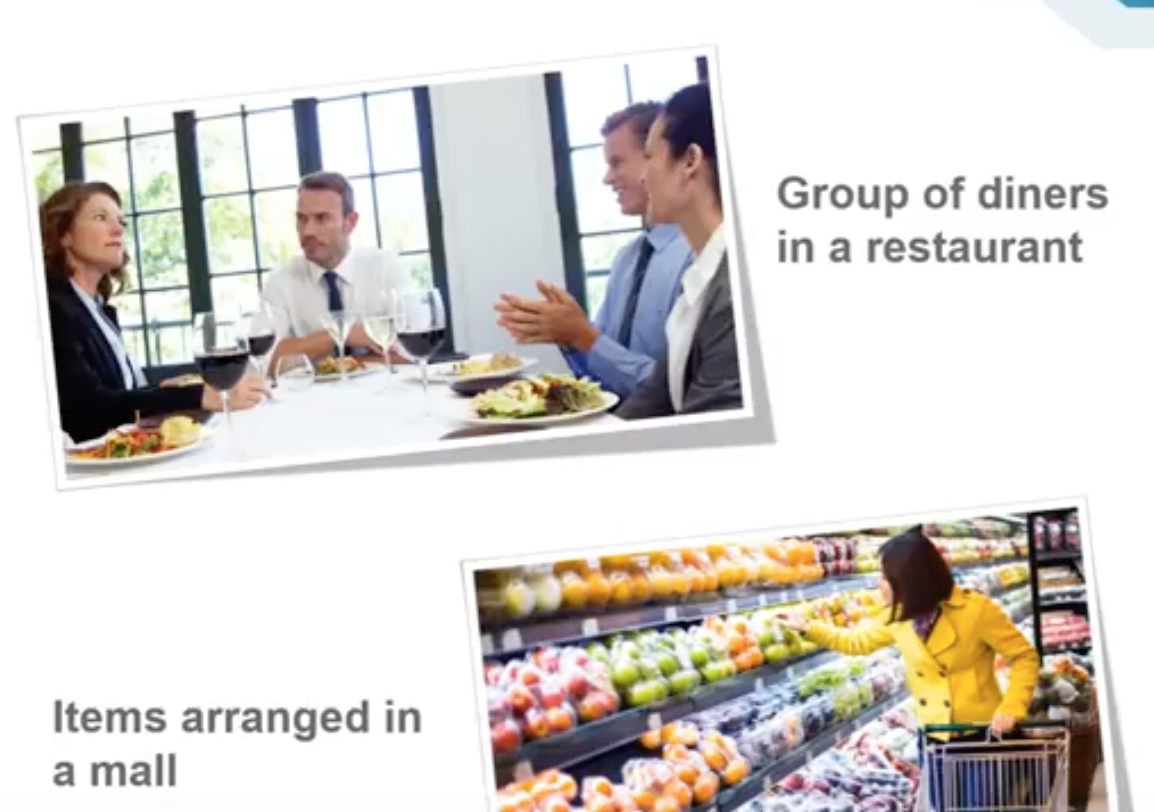

In [81]:
from IPython.display import Image
Image(filename='images/1.png', width=200, height=200)

Diners sitting in table1 are connected to each other and same applies to table2. 
However, diners in table1 are different from table2 and hence are not connected.

Similarly, Clustering the process of dividing the data sets into groups, consisting of similar data points.

- Points in the same group are as similar as possible
- Points in the different group are as dissimilar as possible

Clustering is often referred to as an unsupervised learning technique.

**Real-time usage of Clustering**

- Applications like 'flickr' uses clustering to reduce the number of markers on the map site.
- Amazon uses the popular recommendation system which is using the clustering to show the users the recommended list of products according to their past purchase history.
- Netflix too, uses recommendation algorithm to recommend movies based on watch history.

Clustering is the foundation system for all recommendation algorithms. Clustering can be used to segment the customers in marketing, can be used by social networking sites in marketing new groups based on users data. 

**Types of Clustering**
1. Exclusive clustering
2. Overlapping clustering
3. Hierarchial clustering

**1. Exclusive clustering**

It is a hard clustering in which data points/items exclusively belongs to one cluster.

Example: K-Means clustering

From the below image we can see that, Blue data points lie within blue cluster and pink data points lie within pink cluster. Both clusters are entirely different from each other.

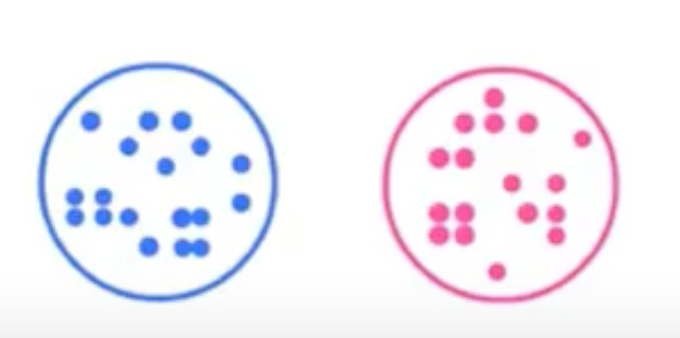

In [82]:
from IPython.display import Image
Image(filename='images/2.png', width=200, height=200)

**2. Overlapping clustering**

It is a soft clustering in which data points/items belongs to multiple clusters.

Example: Fuzzy/C-Means clustering

From the below image we can see that, Some Blue and Pink data points overlap with each other and hence belonging to more than one cluster.

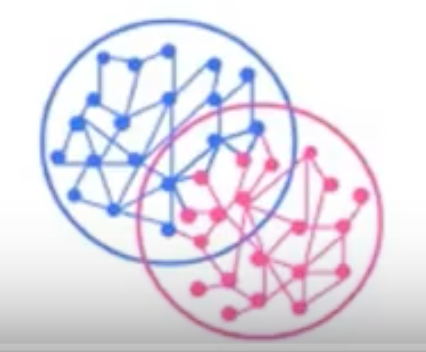

In [83]:
from IPython.display import Image
Image(filename='images/3.png', width=200, height=200)

**3. Hierarchial clustering**

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points.

Example: Dendograms

At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.

From the below image we can see that, 

- Combine A with B and D with E.
- Combination of A and B is combined with C and same applies to D and E with F.
- This is repeated until one big cluster is formed.

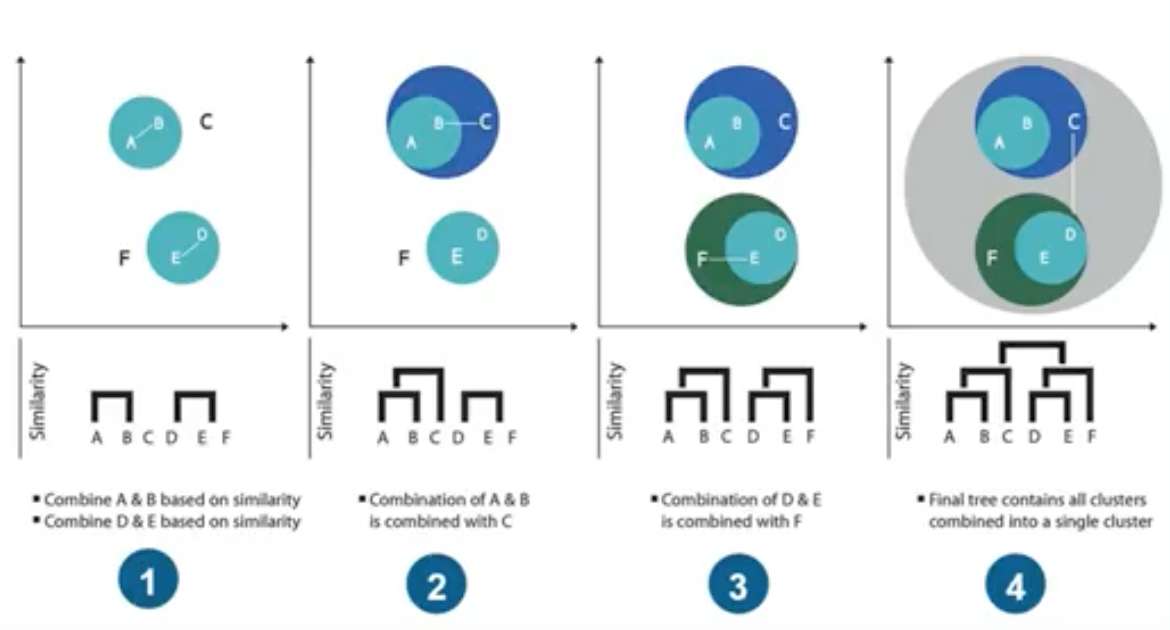

In [85]:
from IPython.display import Image
Image(filename='images/4.png', width=300, height=300)

## K-Means Clustering Algorithm

K-Means is a clustering algorithm whose main goal is to group similar elements or data points/items into a cluster.

'K' here represents the number of clusters/groups.

The algorithm runs iteratively to assign each data points to one of the 'K' groups based on the featues that are known or provided. 

A K-Means algorithm can be applied to numeric or continuous data with smaller number of dimension. It can be also applied to any scenario where a groups of similar things has to be pulled off from randomly distributed collection of data. 

For example, document classification. Clusters of documents can be created in multiple categories based tags, topics and contents of the document. This is the very standard classification problem and K-Means algorithm is one of the highly suitable solution that serves the purpose. 

## K-Means algorithm implementation

Here, K-Means algorithm is implemented using iris data

### Setting up the environment

Bringing in all the necessary libraries

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [ ]:
# to display the plots inline
%matplotlib inline

In [46]:
# call load function to import iris data
iris = datasets.load_iris()

### View IRIS data

In [47]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

### Convert the iris data to Panda DataFrame

Input and Output are seperated as 'x' and 'y' respectively.

In [51]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
# Set target variable as 'y', call dataframe constructor and pass in iris.target
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

### Visualise the data
Display the data by plotting two scatter plots, One for Sepal values and another for Petal. For more clearer view of the data, set it to use some colours.

Text(0.5,1,'Petal')

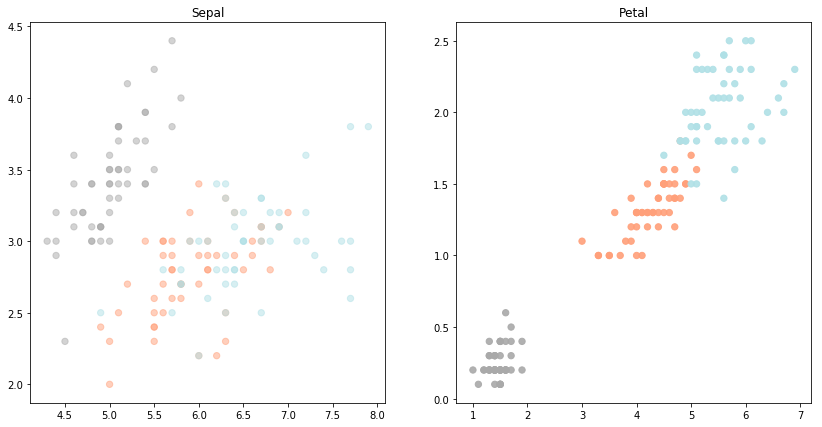

In [71]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['darkgray', 'lightsalmon', 'powderblue'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40, alpha = 0.5)
plt.title('Sepal')
 
# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40, alpha = 0.9)
plt.title('Petal')

### Building the K-Means Model

Create the model and specify the number of clusters the model should find (n_clusters=3).
Then, fit the model to the data.

In [86]:
# To cluster the data K-Means object(model) has to be initiated. 

model = KMeans(n_clusters=3, random_state = 5) 
model.fit(x)

# This computes the K-Means clustering and prints out the summary of the model with defalut model parameters 
# along with the cluster value and random_state values that is set above

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

**Print the results, that is the classes which the model released. The results are unsupervised and are classified purely based on the data.**

In [87]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Visualise the classifier results

**Plot the actual classes against the predicted classes from the K Means model.**

By plotting the Petal Length and Width, each plot changes the colors of the points using either c=colormap[y.Targets] for the original class and  c=colormap[model.labels_] for the predicted classess.

Text(0.5,1,'K-Means Classification')

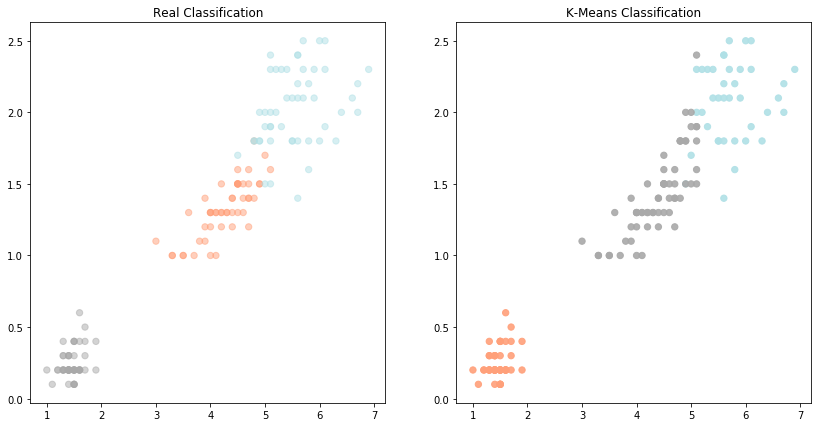

In [75]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['darkgray', 'lightsalmon', 'powderblue'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40, alpha = 0.5)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40, alpha = 0.9)
plt.title('K-Means Classification')

The model appears to be predicted clusters accurately, except for the fact that the clusters themselves are mislabelled. This can be fixed by using the numpy choose() function. Using this function, label names can be reassigned to predicted labels.

### The Fix

1. Change only the class labels, no any of the classification groups 
2. Give each group the correct number which is needed for measuring the performance.

By using the np.choose() new values can be assigned.

Change the 1’s in the predicted values to 0’s and the 0’s to 1’s. Hence, Class 2 is matched.

View the swapped values by print statements.

In [65]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
relabel = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print ('Originally labelled values')
print (model.labels_)
print ('\nRelabelled values')
print (relabel)

Originally labelled values
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Relabelled values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### Evaluate the correction

**Re-plot the data using relabel instead of model.labels_.**

K-Means classifier has now correctly predicted the clusters.

Text(0.5,1,'K Mean Classification')

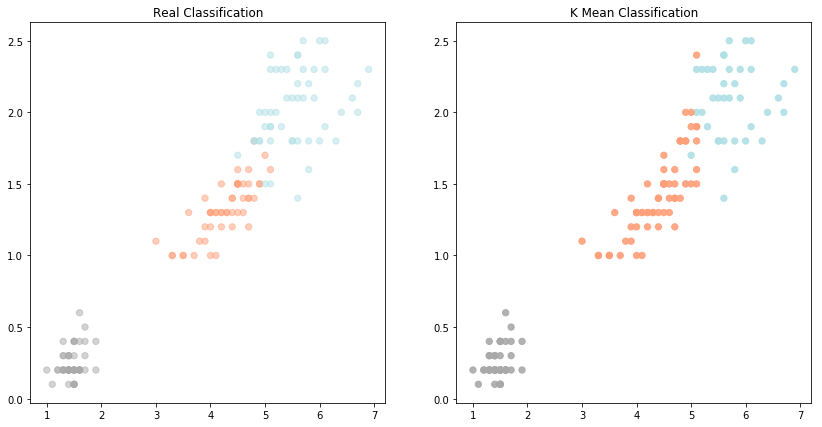

In [76]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['darkgray', 'lightsalmon', 'powderblue'])
 
# Plot Original
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40, alpha = 0.5)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[relabel], s=40, alpha = 0.9)
plt.title('K Mean Classification')

In order to verify the correction quantitatively, we can use scikit-learn's classification report to score the model.

In [89]:
# call the function classification_report and pass the target variable 'y' and 'relabel'ed predicted value variable.
print (classification_report(y, relabel))

# resulted values show the percentage of relevence

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



### Performance Measures

There are a number of ways in which classifiers performance is measured. 

Here, accuracy and the confusion matrix is used as a measure.

**Accuracy**

In [67]:
# y being the original and relabel being the modelled values
sm.accuracy_score(y, relabel)

0.8933333333333333

**Confusion Matrix**

In [70]:
sm.confusion_matrix(y, relabel)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

Summariezing the confusion matrix as,

- correctly identifed all 0 classes as 0’s
- correctly classified 48 class 1’s but miss-classified 2 class 1’s as class 2
- correctly classified 36 class 2’s but miss-classified 14 class 2’s as class 1


**References:**
    
    https://scikit-learn.org/stable/modules/clustering.html
    http://stamfordresearch.com/k-means-clustering-in-python/
    https://www.youtube.com/watch?v=ikt0sny_ImY
        